In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import src.linear_models as lm
import src.utils as utils

In [2]:
train = pd.read_csv("./data/train_redu.csv")
test = pd.read_csv("./data/test_redu.csv")

# Selecionando apenas 1 e 5

In [3]:
train1x5 = utils.filter_0_x_5(train)
test1x5 = utils.filter_0_x_5(test)

# Plot

Plotar os dados de train1x5 em um gráfico de duas dimensões (intensidade X
simetria) como ilustrado na Figura 4. Dados com 𝑙𝑎𝑏𝑒𝑙 = 1 plotar de azul e dados
com 𝑙𝑎𝑏𝑒𝑙 = 5 plotar de vermelho;

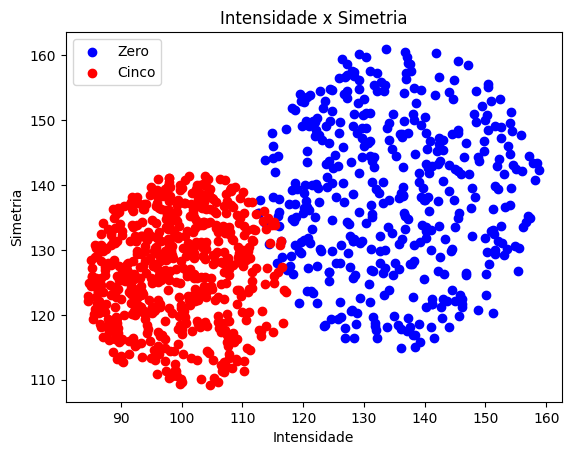

In [19]:
zeros = train1x5[train1x5.loc[:, "label"] == 0]
fives = train1x5[train1x5.loc[:, "label"] == 5]
    
plt.scatter(zeros['intensidade'], zeros['simetria'], color="blue", label="Zero")
plt.scatter(fives['intensidade'], fives['simetria'], color="red", label="Cinco")
plt.ylabel("Simetria")
plt.xlabel("Intensidade")
plt.title("Intensidade x Simetria")
plt.legend()
plt.show()